In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test["PassengerId"]


def clean(data):
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)

    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    data.Embarked.fillna("U", inplace=True)
    return data


data = clean(data)
test = clean(test)


In [4]:
data.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
data.shape

(891, 8)

In [6]:
data['Age'].fillna(data['Age'].mean(), inplace=True)


In [7]:
data.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

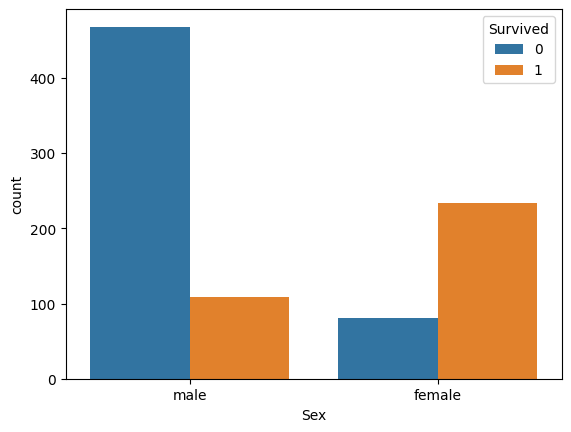

In [9]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

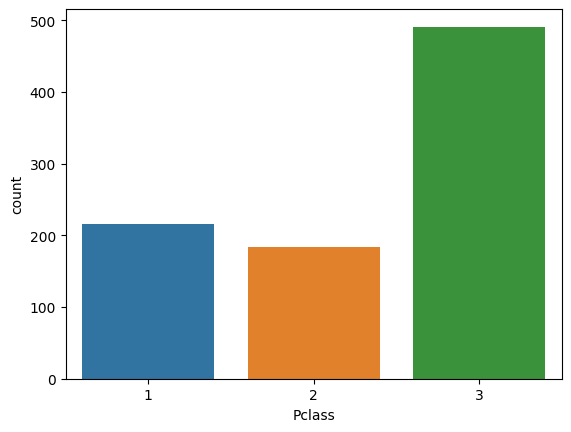

In [10]:
sns.countplot(x = 'Pclass', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

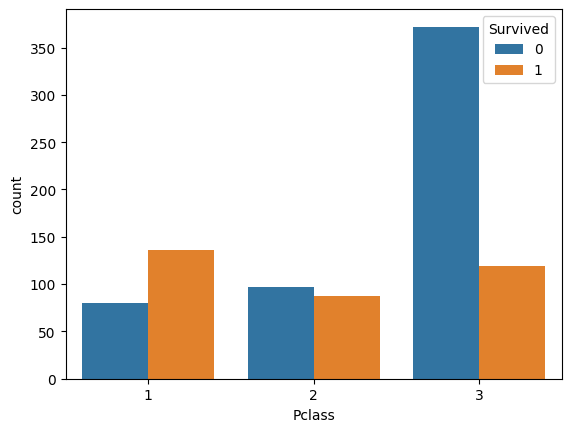

In [11]:
sns.countplot(x = 'Pclass', hue='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

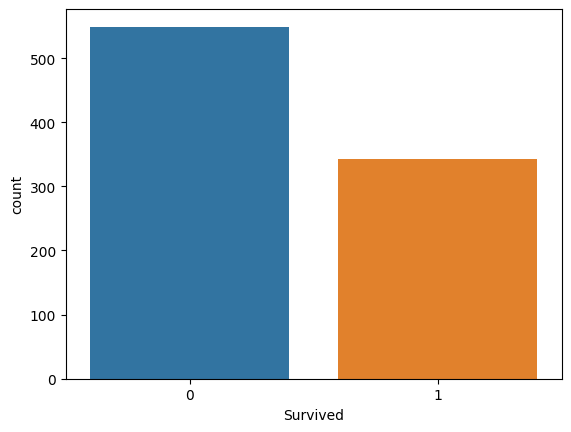

In [12]:
sns.countplot( x = 'Survived', data = data)

<Axes: xlabel='Sex', ylabel='count'>

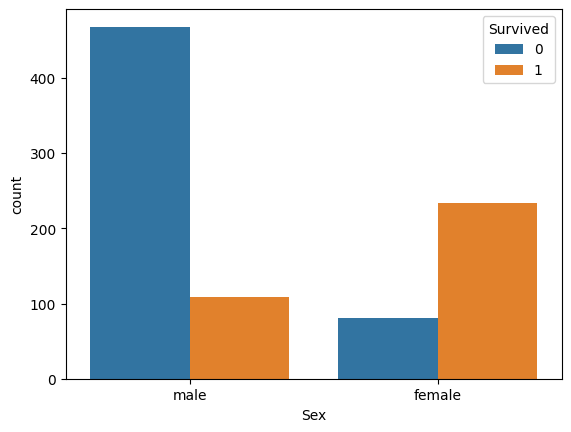

In [13]:
sns.countplot(x='Sex', hue='Survived', data=data)

In [14]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.fit_transform(test[col])
    print(le.classes_)

data.head(5)


['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

y = data['Survived']
X = data.drop('Survived', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [18]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_val)
accuracy_score(y_val, predictions)

0.8100558659217877

In [19]:
submission_preds = clf.predict(test)

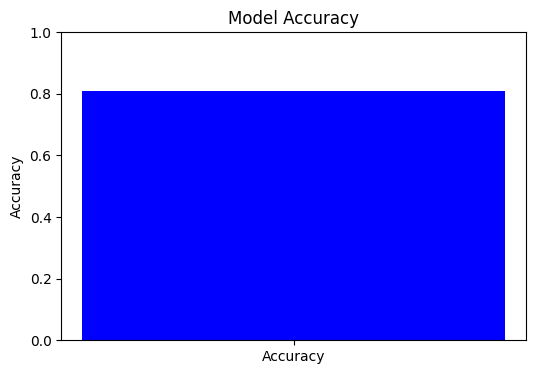

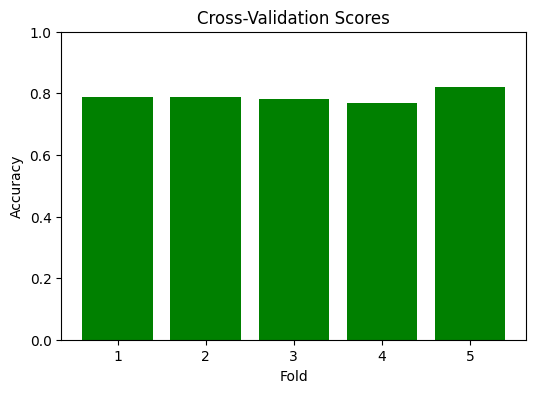

In [41]:
accuracy = accuracy_score(y_val, predictions)
cv_scores = cross_val_score(clf, X, y, cv=5)
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy], color='blue')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.savefig("accuracy.png")

# Plot and save cross-validation scores
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='green')
plt.title("Cross-Validation Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.savefig("cv_scores.png")

In [42]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_preds,
                   })
df.to_csv("submission.csv", index=False)


In [33]:
import gradio as gr


def predict_survival(passenger_id):
    passenger_id = int(passenger_id)
    passenger_data = df[df["PassengerId"] == passenger_id]
    
    if not passenger_data.empty:
        prediction = passenger_data.iloc[0]["Survived"]
        if prediction == 1:
            return "Survived"
        else:
            return "Not Survived"
    else:
        return "Passenger ID not found in test data."

iface = gr.Interface(
    fn=predict_survival,
    inputs="text",
    outputs="text",
    live=True,
    title="🚢Titanic Survival Prediction",
    description="Enter the Passenger ID to predict if the passenger survived or not"
)

iface.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [34]:
import gradio as gr


def predict_survival(passenger_id):
    passenger_id = int(passenger_id)
    passenger_data = df[df["PassengerId"] == passenger_id]
    
    if not passenger_data.empty:
        prediction = passenger_data.iloc[0]["Survived"]
        if prediction == 1:
            return "Survived"
        else:
            return "Not Survived"
    else:
        return "Passenger ID not found in test data."

iface = gr.Interface(
    fn=predict_survival,
    inputs="text",
    outputs="text",
    live=True,
    title="🚢Titanic Survival Prediction",
    description="Enter the Passenger ID to predict if the passenger survived or not"
)

iface.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


Using Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
print('Accuracy:', dectree.score(X_val, y_val)) 
score = cross_val_score(dectree, X, y, cv=5)
dec_cvscore = np.mean(score)
print('CV Score:', dec_cvscore)

Accuracy: 0.776536312849162
CV Score: 0.7766806854560291


Using Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
print('Accuracy:', rforest.score(X_val, y_val)) 
score = cross_val_score(rforest, X, y, cv=5)
rf_cvscore = np.mean(score)
print('CV Score:', rf_cvscore)

Accuracy: 0.8212290502793296
CV Score: 0.8170924612390935


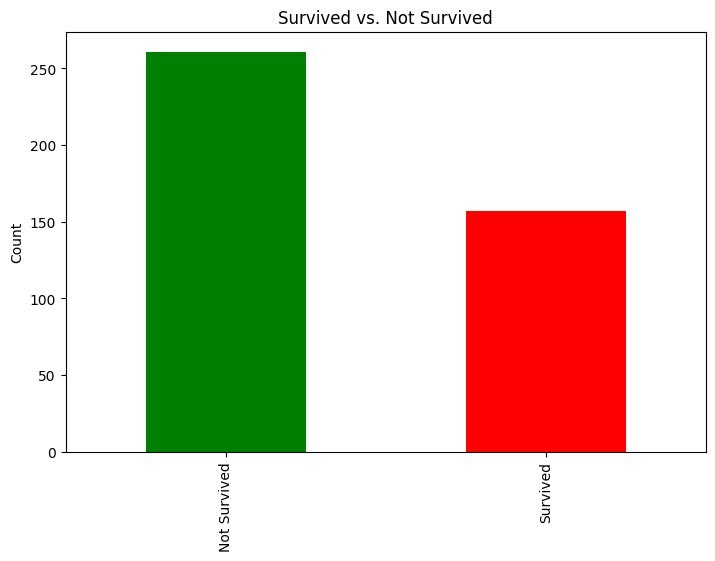

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = pd.DataFrame(df)

# Create a figure with custom dimensions (e.g., 8x6 inches)
plt.figure(figsize=(8, 6))

# Create a bar plot
ax = data['Survived'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Survived vs. Not Survived")
plt.ylabel("Count")

# Set the positions and labels for the ticks
plt.xticks([0, 1], ["Not Survived", "Survived"])

# Adjust the margins to fit the labels
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Save the image as image.png
plt.savefig("src/images/image.png", bbox_inches='tight')

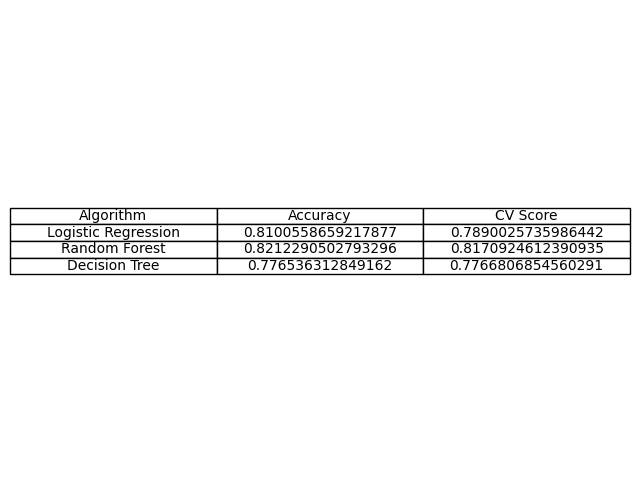

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data for the table
data = {
    'Algorithm': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_val, predictions), rforest.score(X_val, y_val), dectree.score(X_val, y_val)],
    'CV Score': [np.mean(cross_val_score(clf, X, y, cv=5)), np.mean(score), dec_cvscore]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot the DataFrame as a table
plt.figure(figsize=(8, 6))
ax = plt.subplot(frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Save the table as an image
plt.savefig('src/images/algorithm_scores.png', bbox_inches='tight')

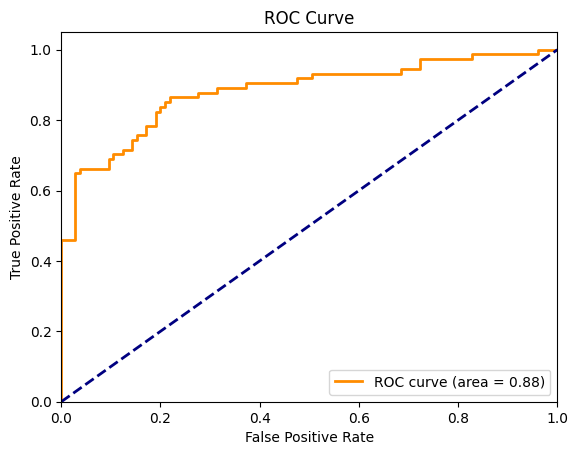

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, clf.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Save ROC curve as an image
plt.savefig('src/images/roc_curve.png')


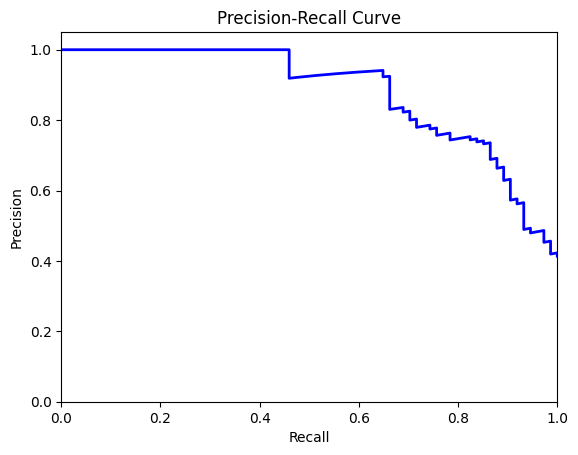

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, clf.predict_proba(X_val)[:,1])

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig('src/images/precision_recall_curve.png')